#第1週

1.   シミュレーションデータを使ってヒストグラムを作成します
2.   エクセルデータをアップロードし、回帰分析を行います
3.   PDFファイルの作成方法を確認します



##演習1. ランタイムのタイプを確認して下さい

*   i-Python notebook (拡張子が ipynb のファイル) は通常、Pythonを利用する環境ですが、今回は ipynb上 で R を使います。そのためには、ランタイムを R にしておく必要があります
*   画面上部のメニューの中に **ランタイム** が見えますか？　クリックすると ドロップダウンメニューの下の方に **ランタイムのタイプを変更** があります。クリックしてみましょう。**ランタイプ** が **R** になっていますか？ 周りの人と同じですか？ 確認して下さい。違っている場合は、教員（あるいはQLA)に声をかけて下さい。

## 演習2. 標準正規乱数の生成と分布

*   以下のコードでは、平均が50、標準偏差が10の正規乱数100個から標本平均を計算する手順を1000回繰り返し、1000個の標本平均を使ってヒストグラムを描きます。
*   次のセルを実行してみましょう。セルの左側の **実行ボタン** をクリックして下さい。結果が出力されるまで 少々時間がかかります。
*   ヒストグラムを周りの人と比べてみて下さい。標本平均の**分布の中心の値**はいくつぐらいですか？ またその値は期待通りですか？ ディスカッションしてみましょう。


In [ ]:
rnum <- 100
xbar <- numeric(rnum)
for(i in 1:rnum){
  xbar[i] <- mean(rnorm(20,50,10))
}
hist(xbar, xlim=c(40, 60), probability=TRUE)

x <- seq(from=40,to=60,by=0.1)
y <- dnorm(x=x,mean=mean(xbar),sd=sd(xbar))
lines(x=x,y=y,col="blue")

###解説

1.   上のプログラムには２つ間違いがありました。問題では「正規乱数を100個生成」、「標本平均を1000個計算」するので、正しくは 1行目 は nrum <- 1000、4行目 は rnorm(100, 50, 10) です。次が正しいプログラムです。


In [ ]:
rnum <- 1000              # 標本平均の計算回数
xbar <- numeric(rnum)      # 1000個の標本平均の格納先    
for(i in 1:rnum){
  xbar[i] <- mean(rnorm(20,50,10))    # 生成した乱数から平均を計算し格納する
}
hist(xbar, xlim=c(40, 60), probability=TRUE)

x <- seq(from=40,to=60,by=0.1)
y <- dnorm(x=x,mean=mean(xbar),sd=sd(xbar))
lines(x=x,y=y,col="blue")

プログラムの中身について説明します。

2.   まず 4行目の rnorm は正規分布に従う乱数を生成する関数です。カッコ内の数値は (生成する乱数の数, 乱数の平均値, 乱数の標準偏差) を表します。
3.   次に ３行目から5行目は 繰り返し作業を行う **ループ** です。３行目の右端の **{** と、５行目の **}** の中の作業をカウンター i が 1からrnumになるまで **rnum** 回繰り返します。この繰り返し回数のrnumは1行目で指定しています。
4.   そして 4行目では生成した標本から 平均 を計算します。
5.   生成した乱数から平均を計算するという操作を3行目から５行目で rnum 回繰り返すわけですが、この平均（標本平均）の格納先を作っておきます。それが 2行目の xbar です。
6.   プログラムの2行目 numeric(rnum) では、numeric関数を使って **0 を n 個並べたベクトルを生成**し、これに xbar という名称をつけておきます。（つまり2行目の段階では、xbarは1000個の要素がすべてゼロのベクトルです）。次のプログラムでは、ゼロが5つのベクトルを生成します。



In [2]:
numeric(5)

[1] 0 0 0 0 0

7.   4行目では、このベクトル xbar の i 番目のセルに、平均値を格納します。
8.   6行目で、rnum個の平均値からヒストグラムを作成します。 xlimはx軸の下限を40、上限を60に設定、probability=TRUEとすることで頻度ではなく密度のグラフになります。
9.   8行目から10行目で、理論上の正規分布を追加します。


##演習3. アイスクリームの需要分析

*   今学期も R を使った分析を行うわけですが、分析に使うデータは多くの場合、エクセルのような表計算ソフトで準備されています。
*   したがって、R(Colab)にエクセルデータをアップロードする方法を知っておく必要があります。
*   以下では、アイスクリームの消費量と気温のデータを保存したエクセルファイルを Colab へアップロードする方法を体験します。


#### 手順１　エクセルデータをColabへアップロードします

> 今回は icecream.xlsx をセッションストレージにアップロードする方法を実行します。
1.   Colabにアップロードする前に、icecream.xlsx を **自分のPCに保存** しておいて下さい。
1.   画面左側の フォルダ のアイコンをクリック。（デフォルトではsample_dataフォルダが見えると思います）
2.   次に アップロード のアイコンをクリック
3.   **自分のPCに保存** してある icecream.xlsx を選択して「開く」をクリック。（sample_dataフォルダの下に icecream.xlsx が追加されればアップロード成功です）   









#### 手順２　Rへデータを読み込みます

*   readxl パッケージを使います。このパッケージは、Colabに最初からインストールされているので、libraryでアクティベートするだけで使用できます。
*   次のセルを実行してみましょう。

In [ ]:
library(readxl)
df <- read_excel("icecream.xlsx", sheet="tokyo")

#### 手順３　Rに正しく読み込めたかどうか、確認してみましょう

##### temp (気温データ) です。

*   次のセルを実行してみましょう。 データフレーム df に保存された 気温データ (temp) を出力します。 画面に次の数列が出力されればOKです。

5.85.710.314.521.122.126.226.722.618.413.99.3



In [ ]:
df$temp

[1]  5.8  5.7 10.3 14.5 21.1 22.1 26.2 26.7 22.6 18.4 13.9  9.3

#### 手順４　横軸が気温、縦軸がアイスクリームの消費量の散布図を描いてみましょう。

---



In [ ]:
plot(df$temp,df$icecream)

#### 手順５　回帰分析を行います。次の回帰式を推計してみましょう。
$icecream=\beta_0+\beta_1 temp+u$

*   気温が1度上昇すると、アイスクリームの消費量はどれだけ変化していますか？



In [ ]:
regout <- lm(formula=icecream~temp,data=df)
regout
summary(regout)


Call:
lm(formula = icecream ~ temp, data = df)

Coefficients:
(Intercept)         temp  
      91.99        14.86  



Call:
lm(formula = icecream ~ temp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.995 -42.543  -4.396  38.640  87.421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   91.990     43.917   2.095 0.062642 .  
temp          14.856      2.454   6.055 0.000123 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61.27 on 10 degrees of freedom
Multiple R-squared:  0.7857,	Adjusted R-squared:  0.7642 
F-statistic: 36.66 on 1 and 10 DF,  p-value: 0.0001228


####手順６　散布図に標本回帰直線を追加してみましょう。

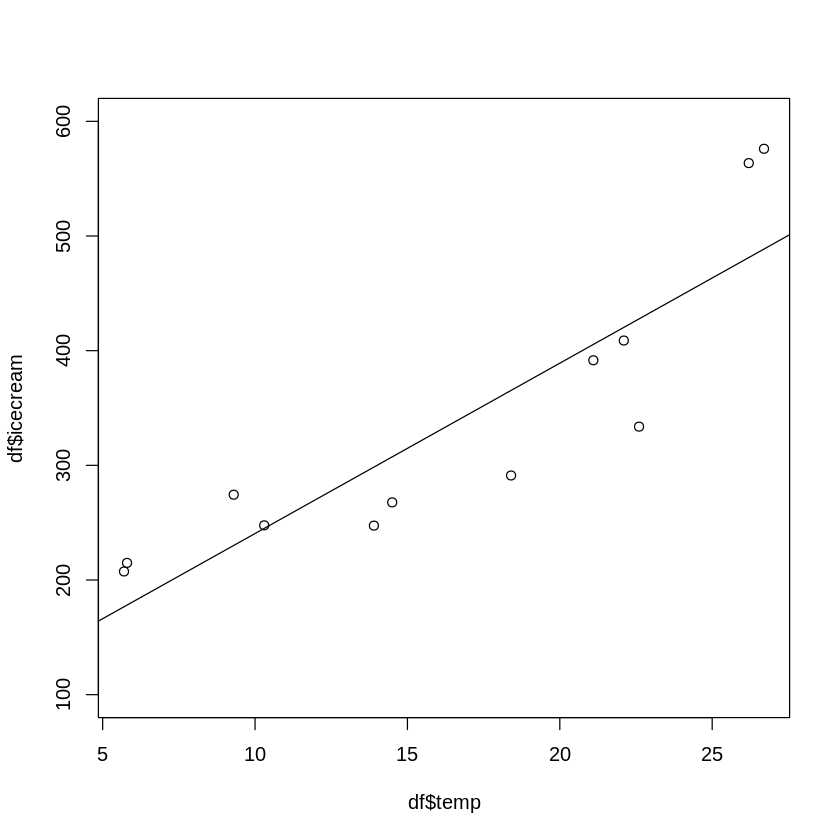

In [ ]:
plot(df$temp, df$icecream, ylim=c(100,600))
regout <- lm(formula=icecream~temp,data=df)
abline(reg=regout)

####手順７　ノートブックを PDF形式 で出力してみましょう

*   今学期の授業では、授業中に Colabを使ってPC演習します。PC演習の結果を入力した ノートブック(=Google Colab) をときどき提出してもらいます。
*   ここでは ノートブックを PDF形式 に変換する方法を演習します。（今後、CoursePowerへ提出してもらうときは ipynb形式ではなく、pdf形式のファイルを提出してもらうことになるので）

PDFファイルを作成する手順
1.   このファイル(ipynb)を一旦保存し、各自のPCにダウンロードします（メニューの ファイル / ダウンロード を選択）
2.   別に配布した ipynb2html.ipynb を起動。これを使って htmlファイルを作成します
3.   最後に htmlファイルからPDF形式で印刷を選択してPDFファイルを作成します

*   PDFファイルは各自のPCに保存して下さい。ファイル名は学籍番号 (**ue191001.pdf**という具合）にして下さい。
*   CoursePowerの課題提出先へアップロードして下さい。 



##まとめ

今回の演習内容は以下の通りです。
1.   ランタイムの確認方法
2.   ノートブックのアップロード方法
3.   Rコードの実行方法
4.   エクセルファイルのアップロード方法
5.   ノートブックのPDF書式での出力方法


*   今学期は ノートブックファイル や データファイル を配布し、適宜PC演習を行います。
*   本日の操作方法は計量経済分析以前の内容なので、慣れておきましょう。


